In [ ]:
### Data used in this analysis
# Title :
# Monthly version of HadISST sea surface temperature component

# description :
# HadISST 1.1 monthly average sea surface temperature

# institution :
# Met Office Hadley Centre

# source :
# HadISST

# reference :
# Rayner, N. A., Parker, D. E., Horton, E. B., Folland, C. K., Alexander, L. V., Rowell, D. P., Kent, E. C., Kaplan, A.  Global analyses of sea surface temperature, sea ice, and night marine air temperature since the late nineteenth century J. Geophys. Res.Vol. 108, No. D14, 4407 10.1029/2002JD002670

# Conventions :
# CF-1.0

# history :
# 2/8/2022 converted to netcdf from pp format

# supplementary_information :
# Updates and supplementary information will be available from http://www.metoffice.gov.uk/hadobs/hadisst

# comment :
# Data restrictions: for academic research use only. Data are Crown copyright see (http://www.opsi.gov.uk/advice/crown-copyright/copyright-guidance/index.htm)

In [2]:
import xarray as xr
import matplotlib.dates as mdates
import numpy as np
import matplotlib
from matplotlib import rcParams
import datetime
import pandas as pd
import cftime
import pylab as plt
import netCDF4 as nc
from numpy import ma
import dask as dd

#stash codes
stash_ch4 = 'mass_fraction_of_methane_in_air'
stash_co = 'mass_fraction_of_carbon_monoxide_in_air'
stash_ch4_oh = 'm01s50i041'
stash_oh = 'mass_fraction_of_hydroxyl_radical_in_air'
stash_o3 = 'mass_fraction_of_ozone_in_air'
stash_trop = 'm01s50i062'
stash_mass = 'm01s50i063'
stash_temp = 'surface_temperature'
stash_ems = 'm01s50i306'

In [53]:
def moving_average(x, months):
    return np.convolve(x, np.ones(months), 'valid') / months

In [31]:
# Import Hadley SST data
had_data = xr.open_dataset('HadISST_sst.nc')
had = had_data.sst

In [32]:
# Select Nino3.4 region to determine index
nino34 = had.loc[:,5:-5,-170:-120]
lat = nino34.latitude
lon = nino34.longitude

In [71]:
# Calculate moving averages to determine index
nino34_mean = np.mean(nino34,axis=(1,2))

nino34_3monmean = moving_average(nino34_mean,3)
nino34_30yrmean = moving_average(nino34_mean,361)

sst_anomaly = nino34_3monmean[179:-179] - nino34_30yrmean

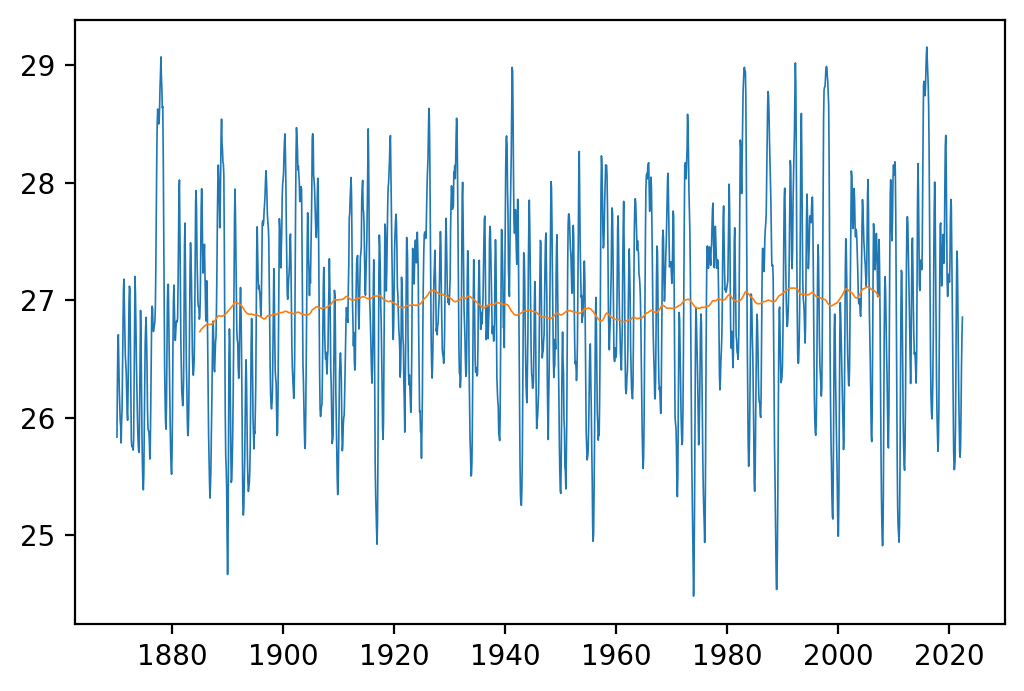

In [76]:
fig = plt.figure(dpi=200)
ax = plt.axes()

ax.plot(nino34.time[1:-1],nino34_3monmean,label='3mon mean',linewidth=0.6)
ax.plot(nino34.time[180:-180],nino34_30yrmean,label='30yr mean',linewidth=0.6)

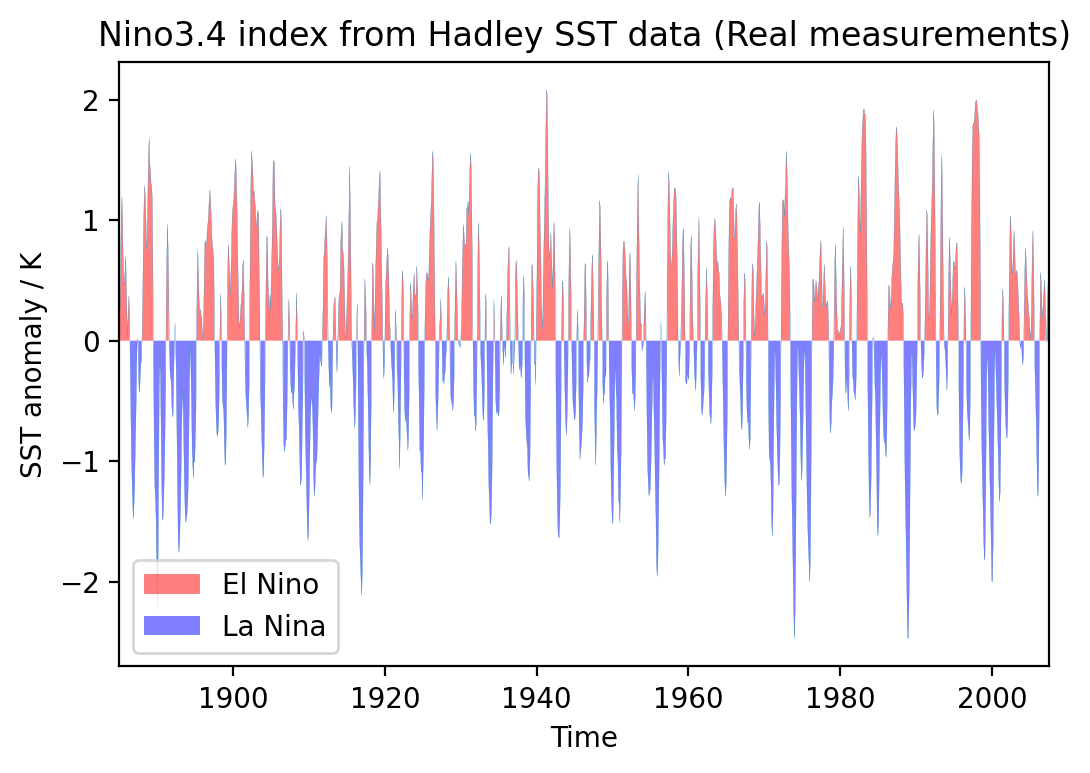

In [86]:
fig = plt.figure(dpi=200)
ax = plt.axes()
plt.title('Nino3.4 index from Hadley SST data (Real measurements)')

ax.plot(nino34.time[180:-180],sst_anomaly,linewidth=0.1)

ax.set_ylabel('SST anomaly / K')
ax.set_xlabel('Time')
ax.set_xlim(nino34.time[180],nino34.time[-180])

p1 = ax.fill_between(nino34.time[180:-180], sst_anomaly, 0 ,where=(sst_anomaly > 0), facecolor='red', alpha=0.5, label = 'El Nino')
p2 = ax.fill_between(nino34.time[180:-180], sst_anomaly, 0 ,where=(sst_anomaly < 0), facecolor='blue', alpha=0.5, label = 'La Nina')

plt.legend()